# Chest X-Ray Pneumonia Data Exploration
###### Harshit Gupta

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Uploading Kaggle Credentials < Redacted > 

In [ ]:
from google.colab import files
files.upload()

## Installing Kaggle Library to Import Data

In [4]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/

## Downloading the Data 

In [6]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!ls

100% 2.29G/2.29G [00:51<00:00, 42.1MB/s]
100% 2.29G/2.29G [00:51<00:00, 47.7MB/s]
chest-xray-pneumonia.zip  kaggle.json  sample_data


## Unzipping Data from .zip

In [7]:
from zipfile import ZipFile
zip_file = ZipFile('/content/chest-xray-pneumonia.zip')
zip_file.extractall('/content/chest-xray-pneumonia')

In [8]:
!ls /content/chest-xray-pneumonia/chest_xray/chest_xray

test  train  val


## Setting Directory Paths for Train, Test & Validation Set

In [9]:
import os
# Directory with our training n
train_NORMAL_dir = os.path.join('/content/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL')

# Directory with our training p
train_PNEUMONIA_dir = os.path.join('/content/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA')

# Directory with our test n
test_NORMAL_dir = os.path.join('/content/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL')

# Directory with our test p
test_PNEUMONIA_dir = os.path.join('/content/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA')

# Directory with our test n
val_NORMAL_dir = os.path.join('/content/chest-xray-pneumonia/chest_xray/chest_xray/val/NORMAL')

# Directory with our test p
val_PNEUMONIA_dir = os.path.join('/content/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA')



## Count of each class in each dataset
Train | Validation | Test 

In [12]:
print("Training Set")
train_NORMAL_names = os.listdir(train_NORMAL_dir)
print("Normal X-Rays: " + str(len(train_NORMAL_names)))
train_PNEUMONIA_names = os.listdir(train_PNEUMONIA_dir)
print("Pneumonia X-Rays: " + str(len(train_PNEUMONIA_names)))
print()
print("Test Set")
test_NORMAL_names = os.listdir(test_NORMAL_dir)
print("Normal X-Rays: " + str(len(test_NORMAL_names)))
test_PNEUMONIA_names = os.listdir(test_PNEUMONIA_dir)
print("Pneumonia X-Rays: " + str(len(test_PNEUMONIA_names)))
print()
print("Validation Set")
val_NORMAL_names = os.listdir(val_NORMAL_dir)
print("Normal X-Rays: " + str(len(val_NORMAL_names)))
val_PNEUMONIA_names = os.listdir(val_PNEUMONIA_dir)
print("Pneumonia X-Rays: " + str(len(val_PNEUMONIA_names)))
print()

Training Set
Normal X-Rays: 1342
Pneumonia X-Rays: 3876

Test Set
Normal X-Rays: 234
Pneumonia X-Rays: 390

Validation Set
Normal X-Rays: 9
Pneumonia X-Rays: 9



As we can see, the data is quite balanced in Training and Test Set. The vaidation set is very small which me bring in bias at the time of training. We may look into it at the time of training.

## Viewing the Filenames of a sample of 10 from the training set
 (Not touching validation and test set to be totally clueless about them)

In [13]:
train_NORMAL_names = os.listdir(train_NORMAL_dir)
print(train_NORMAL_names[:10])
train_PNEUMONIA_names = os.listdir(train_PNEUMONIA_dir)
print(train_PNEUMONIA_names[:10])


['IM-0257-0001.jpeg', 'NORMAL2-IM-1176-0001.jpeg', 'NORMAL2-IM-1164-0001.jpeg', 'NORMAL2-IM-0772-0001.jpeg', 'IM-0722-0001.jpeg', 'IM-0629-0001-0002.jpeg', 'IM-0341-0001.jpeg', 'NORMAL2-IM-0690-0001.jpeg', 'NORMAL2-IM-0596-0001.jpeg', 'IM-0302-0001.jpeg']
['person610_virus_1177.jpeg', 'person387_virus_772.jpeg', 'person582_bacteria_2403.jpeg', 'person266_bacteria_1248.jpeg', 'person1310_bacteria_3295.jpeg', 'person1345_bacteria_3424.jpeg', 'person26_bacteria_122.jpeg', 'person846_bacteria_2766.jpeg', 'person836_bacteria_2752.jpeg', 'person291_bacteria_1377.jpeg']


## Viewing Samples from Training Set
The first 8 images are normal X-Rays.
The remaining 8 are Pneumonia X-Rays

### Preparing the images and loading into variables to display

In [27]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 2
ncols = 4

# Index for iterating over images
pic_index = 0

pic_index += 8
next_normal_pix = [os.path.join(train_NORMAL_dir, fname) 
                for fname in train_NORMAL_names[pic_index-8:pic_index]]
next_pneumonia_pix = [os.path.join(train_PNEUMONIA_dir, fname) 
                for fname in train_PNEUMONIA_names[pic_index-8:pic_index]]

### Normal X-Rays

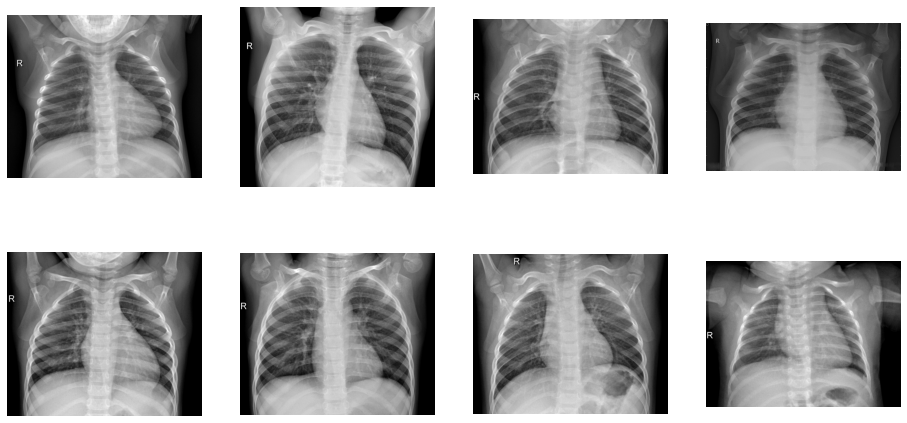

In [28]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

for i, img_path in enumerate(next_normal_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img, cmap = 'gray')

plt.show()

### Pneumonia X-Rays

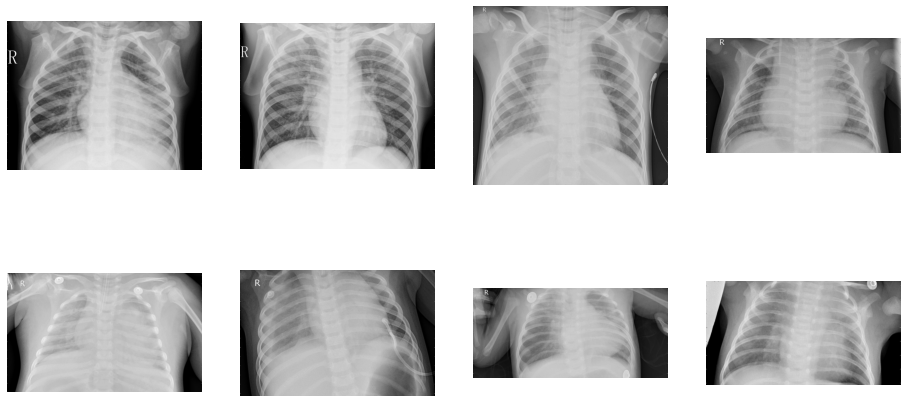

In [29]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

for i, img_path in enumerate(next_pneumonia_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img, cmap = 'gray')

plt.show()

### Installing library  
We will need it at the time of building and training the model

In [30]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 49kB/s 
     |████████████████████████████████| 501kB 39.0MB/s 
     |████████████████████████████████| 4.3MB 41.8MB/s 


## Preparing Data to feed into a model

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255,
                                  )
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/chest-xray-pneumonia/chest_xray/chest_xray/train',  # This is the source directory for training images
        target_size=(300, 300),  
        batch_size=64,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# All images will be rescaled by 1./255
val_datagen = ImageDataGenerator(rescale=1/255
                                  )

val_generator = val_datagen.flow_from_directory(
        '/content/chest-xray-pneumonia/chest_xray/chest_xray/val',  
        target_size=(300, 300),
        batch_size=1,
        class_mode='binary')


test_datagen = ImageDataGenerator(rescale=1/255)

test_generator = test_datagen.flow_from_directory(
        '/content/chest-xray-pneumonia/chest_xray/chest_xray/test',  
        target_size=(300, 300),
        batch_size=64,
        class_mode='binary')



Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Results


*   The data utilized 2.9GBs on disk
*   The dataset is split into 3 sets
  * Training Set
     * Normal X-Rays: 1342
     * Pneumonia X-Rays: 3876

  * Test Set
     * Normal X-Rays: 234
     * Pneumonia X-Rays: 390

  * Validation Set
     * Normal X-Rays: 9
     * Pneumonia X-Rays: 9
*   The data doesn't require cleaning as it is already clean





